<a href="https://colab.research.google.com/github/ftmhrahimi/Deep_Learning_F20_Assignments/blob/master/Assignment_Set_2/Part1/Cifar_10(v2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 10
optimizer = Adam()
validation_split = 0.2
verbosity = 1

In [ ]:
# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

In [ ]:
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

In [ ]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

## **First Model**

In [ ]:
# Create the model
import keras
model = Sequential()

model.add(keras.Input(shape=input_shape))  
model.add(Conv2D(32, 5, strides=2, activation="relu"))
model.add(Flatten())
model.add(Dense(no_classes, activation='softmax'))
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 14, 14, 32)        2432      
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                62730     
Total params: 65,162
Trainable params: 65,162
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=20,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/20
800/800 [==============================] - 9s 11ms/step - loss: 1.3716 - accuracy: 0.5245 - val_loss: 1.4684 - val_accuracy: 0.4853
Epoch 2/20
800/800 [==============================] - 9s 11ms/step - loss: 1.3592 - accuracy: 0.5293 - val_loss: 1.4574 - val_accuracy: 0.4934
Epoch 3/20
800/800 [==============================] - 9s 11ms/step - loss: 1.3375 - accuracy: 0.5368 - val_loss: 1.4227 - val_accuracy: 0.5056
Epoch 4/20
800/800 [==============================] - 9s 11ms/step - loss: 1.3136 - accuracy: 0.5436 - val_loss: 1.4155 - val_accuracy: 0.5052
Epoch 5/20
800/800 [==============================] - 9s 11ms/step - loss: 1.2924 - accuracy: 0.5522 - val_loss: 1.3919 - val_accuracy: 0.5137
Epoch 6/20
800/800 [==============================] - 9s 11ms/step - loss: 1.2725 - accuracy: 0.5585 - val_loss: 1.4116 - val_accuracy: 0.5101
Epoch 7/20
800/800 [==============================] - 9s 12ms/step - loss: 1.2570 - accuracy: 0.5660 - val_loss: 1.3881 - val_accuracy: 0.5171

Test loss: 1.3624451160430908 / Test accuracy: 0.5295000076293945


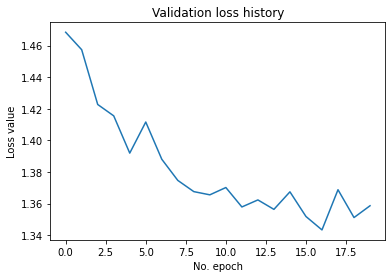

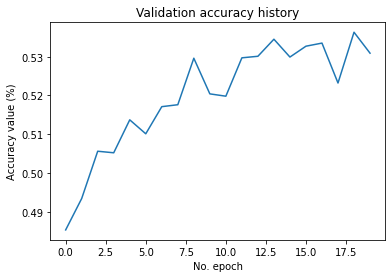

In [ ]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## **Second Model**

In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)             

In [ ]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/10
800/800 [==============================] - 56s 70ms/step - loss: 1.0534 - accuracy: 0.6272 - val_loss: 1.0524 - val_accuracy: 0.6291
Epoch 2/10
800/800 [==============================] - 56s 70ms/step - loss: 0.9356 - accuracy: 0.6703 - val_loss: 0.9641 - val_accuracy: 0.6606
Epoch 3/10
800/800 [==============================] - 57s 71ms/step - loss: 0.8311 - accuracy: 0.7073 - val_loss: 0.9630 - val_accuracy: 0.6674
Epoch 4/10
800/800 [==============================] - 57s 71ms/step - loss: 0.7521 - accuracy: 0.7331 - val_loss: 0.9630 - val_accuracy: 0.6723
Epoch 5/10
800/800 [==============================] - 56s 71ms/step - loss: 0.6812 - accuracy: 0.7595 - val_loss: 0.9086 - val_accuracy: 0.6984
Epoch 6/10
800/800 [==============================] - 56s 70ms/step - loss: 0.6194 - accuracy: 0.7834 - val_loss: 0.9165 - val_accuracy: 0.6989
Epoch 7/10
800/800 [==============================] - 56s 70ms/step - loss: 0.5642 - accuracy: 0.8016 - val_loss: 0.9236 - val_accuracy:

Test loss: 1.0525051355361938 / Test accuracy: 0.6919000148773193


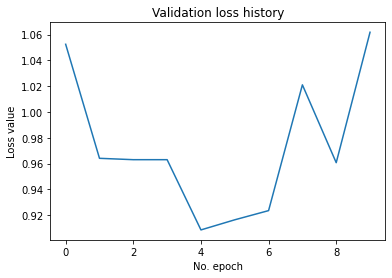

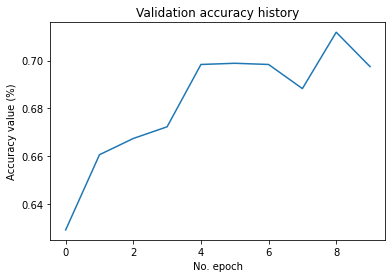

In [ ]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()